### Feature Engineering - Machine Learning Modeling - Capstone 2

In [1]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

### Load Libraries

In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sns
import os
import statsmodels.api as sm
import scipy.stats as ss
import itertools
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

In [3]:
train_data = pd.read_csv('Train_rev1.csv')

### Clean-up

In [4]:
def scrub_data(data, columns, axis, vals, names):
    #drop useless columns
    data = data.drop(columns, axis = 1)
    #detect the missing data
    missingcounts = data.isnull().sum()
    missingcols = [col for col in missingcounts.keys() if missingcounts[col] != 0]
    #fill the missing data with specific values
    values = dict(zip(missingcols, vals))
    data = data.fillna(value = values)
    #rename the columns
    data.columns = names
    return data

In [5]:
#fill missing data for "ContractType", "ContractTime", "Company" with Unknown
train_data = train_data.fillna("Unknown")

#rename the columns
names = ["Job Code", "Title", "Job Description", "Region", "Location", "ContractType", "ContractTime", "Company", "Category", "Salary_Range", "Salary","Source_Name"]
train_data.columns = names


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244768 entries, 0 to 244767
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Job Code         244768 non-null  int64 
 1   Title            244768 non-null  object
 2   Job Description  244768 non-null  object
 3   Region           244768 non-null  object
 4   Location         244768 non-null  object
 5   ContractType     244768 non-null  object
 6   ContractTime     244768 non-null  object
 7   Company          244768 non-null  object
 8   Category         244768 non-null  object
 9   Salary_Range     244768 non-null  object
 10  Salary           244768 non-null  int64 
 11  Source_Name      244768 non-null  object
dtypes: int64(2), object(10)
memory usage: 22.4+ MB


#### Features for Categorical variables

In [7]:
num_variables = ['Job Code','Salary']
cat_variables = ['Title', 'Job Description', 'Region', 'Location',
       'ContractType', 'ContractTime', 'Company', 'Category', 'Salary_Range', 'Source_Name']
feat_variables = ['Category', 'ContractTime','ContractType','Salary']

#### "Job Code" Column

In [8]:
tit0 = train_data["Job Code"].value_counts()

In [9]:
lst0 = tit0[tit0 >= 100].index.tolist()

In [10]:
train_data.loc[~train_data["Job Code"].isin(lst0), "Job Code"] = "Other"

#### Title Column

In [11]:
train_data[["Title"]].value_counts()

Title                            
Business Development Manager         921
Project Manager                      749
Management Accountant                661
Sales Executive                      603
Account Manager                      540
                                    ... 
HR Advisor  FTC ****m                  1
HR Advisor  Employee Relations         1
HR Advisor  ER Specialist  Retail      1
HR Advisor  BRISTOL                    1
﻿Call Centre Sales Operative           1
Length: 135436, dtype: int64

In [12]:
tit1 = train_data["Title"].value_counts()

In [13]:
lst1 = tit1[tit1 >= 100].index.tolist()

In [14]:
train_data.loc[~train_data["Title"].isin(lst1), "Title"] = "Other"

#### Job Description Column

In [15]:
train_data[["Job Description"]].value_counts()[:1]

Job Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [16]:
tit2 = train_data["Job Description"].value_counts()

In [17]:
lst2 = tit2[tit2 >= 100].index.tolist()

In [18]:
train_data.loc[~train_data["Job Description"].isin(lst2), "Job Description"] = "Other"

#### Region Column

In [19]:
train_data[["Region"]].value_counts()[:10]

Region                          
London                              15605
London South East                    8689
UK                                   5538
City London South East               2843
City of London - London              2344
West Midlands                        2263
City of London                       2200
Manchester Lancashire North West     1887
Birmingham                           1879
Central London                       1714
dtype: int64

In [20]:
tit3 = train_data["Region"].value_counts()

In [21]:
lst3 = tit3[tit3 >= 100].index.tolist()

In [22]:
train_data.loc[~train_data["Region"].isin(lst3), "Region"] = "Other"

#### Location Column

In [23]:
train_data[["Location"]].value_counts()[:4]

Location         
UK                   41093
London               30522
South East London    11713
The City              6678
dtype: int64

In [24]:
tit4 = train_data["Location"].value_counts()

In [25]:
lst4 = tit4[tit4 >= 100].index.tolist()

In [26]:
train_data.loc[~train_data["Location"].isin(lst4), "Location"] = "Other"

#### ContractType Column

In [27]:
train_data[["ContractType"]].value_counts()[:4]

ContractType
Unknown         179326
full_time        57538
part_time         7904
dtype: int64

In [28]:
tit5 = train_data["ContractType"].value_counts()

In [29]:
lst5 = tit5[tit5 >= 100].index.tolist()

In [30]:
train_data.loc[~train_data["ContractType"].isin(lst5), "ContractType"] = "Other"

#### ContractTime Column

In [31]:
train_data[["ContractTime"]].value_counts()[:4]

ContractTime
permanent       151521
Unknown          63905
contract         29342
dtype: int64

In [32]:
tit6 = train_data["ContractTime"].value_counts()

In [33]:
lst6 = tit6[tit6 >= 100].index.tolist()

In [34]:
train_data.loc[~train_data["ContractTime"].isin(lst6), "ContractTime"] = "Other"

#### Company Column

In [35]:
train_data[["Company"]].value_counts()[:4]

Company      
Unknown          32434
UKStaffsearch     4997
CVbrowser         2977
London4Jobs       2345
dtype: int64

In [36]:
tit7 = train_data["Company"].value_counts()

In [37]:
lst7 = tit7[tit7 >= 100].index.tolist()

In [38]:
train_data.loc[~train_data["Company"].isin(lst7), "Company"] = "Other"

#### Category Column

In [39]:
train_data[["Category"]].value_counts()[:4]

Category                 
IT Jobs                      38483
Engineering Jobs             25174
Accounting & Finance Jobs    21846
Healthcare & Nursing Jobs    21076
dtype: int64

In [40]:
tit8 = train_data["Category"].value_counts()

In [41]:
lst8 = tit8[tit8 >= 100].index.tolist()

In [42]:
train_data.loc[~train_data["Category"].isin(lst8), "Category"] = "Other"

#### Salary Range Column

In [43]:
train_data[["Salary_Range"]].value_counts()[:4]

Salary_Range        
50,000-74,999 yearly    1923
35000                    868
40000                    834
45000                    764
dtype: int64

In [44]:
tit9 = train_data["Salary_Range"].value_counts()

In [45]:
lst9 = tit9[tit9 >= 100].index.tolist()

In [46]:
train_data.loc[~train_data["Salary_Range"].isin(lst9), "Salary_Range"] = "Other"

#### Source_Name Column

In [47]:
train_data[["Source_Name"]].value_counts()[:4]

Source_Name     
totaljobs.com       48149
cv-library.co.uk    34279
Jobcentre Plus      17929
jobsite.co.uk       12225
dtype: int64

In [48]:
tit10 = train_data["Source_Name"].value_counts()

In [49]:
lst10 = tit10[tit10 >= 100].index.tolist()

In [50]:
train_data.loc[~train_data["Source_Name"].isin(lst10), "Source_Name"] = "Other"

#### Explore Changes

In [51]:
train_data.head()

,Job Code,Title,Job Description,Region,Location,ContractType,ContractTime,Company,Category,Salary_Range,Salary,Source_Name
0,Other,Other,Other,Other,Dorking,Unknown,permanent,Other,Engineering Jobs,Other,25000,cv-library.co.uk
1,Other,Other,Other,Other,Glasgow,Unknown,permanent,Other,Engineering Jobs,Other,30000,cv-library.co.uk
2,Other,Other,Other,Other,Hampshire,Unknown,permanent,Other,Engineering Jobs,Other,30000,cv-library.co.uk
3,Other,Other,Other,Other,Surrey,Unknown,permanent,Other,Engineering Jobs,Other,27500,cv-library.co.uk
4,Other,Other,Other,Other,Surrey,Unknown,permanent,Other,Engineering Jobs,Other,25000,cv-library.co.uk


#### Feature Selection & Get dummies

In [52]:
# One-hot encoding for nominal variables
one_hot_var = ['Region','Location','Category', 'ContractType','ContractTime','Salary_Range']
train_data_dum = pd.get_dummies(train_data[one_hot_var], drop_first=True)
train_data_dum.head()

,Region_Aberdeen Aberdeenshire Scotland,"Region_Aberdeen,","Region_Aberdeen, Scotland","Region_Aberdeen, UK",Region_Abingdon Oxfordshire South East,Region_Avon,Region_Aylesbury,Region_Aylesbury Buckinghamshire South East,Region_BIRMINGHAM,Region_Banbury Oxfordshire South East,...,"Salary_Range_From 35,000 to 45,000 per annum","Salary_Range_From 35,000 to 45,000 per year","Salary_Range_From 40,000 to 45,000 per annum","Salary_Range_From 40,000 to 45,000 per year","Salary_Range_From 40,000 to 50,000 per annum","Salary_Range_From 40,000 to 50,000 per year","Salary_Range_From 45,000 to 50,000 per year","Salary_Range_From 50,000 to 60,000 per year",Salary_Range_Other,"Salary_Range_Up to 34,200 Annual"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


#### Create y matrics from dataframe where y=Salary

In [53]:
y=train_data.iloc[:,10]
y.head()

0    25000
1    30000
2    30000
3    27500
4    25000
Name: Salary, dtype: int64

#### Create X matrics from dataframe

In [54]:
X=train_data.iloc[:,: 12]
X.head()

,Job Code,Title,Job Description,Region,Location,ContractType,ContractTime,Company,Category,Salary_Range,Salary,Source_Name
0,Other,Other,Other,Other,Dorking,Unknown,permanent,Other,Engineering Jobs,Other,25000,cv-library.co.uk
1,Other,Other,Other,Other,Glasgow,Unknown,permanent,Other,Engineering Jobs,Other,30000,cv-library.co.uk
2,Other,Other,Other,Other,Hampshire,Unknown,permanent,Other,Engineering Jobs,Other,30000,cv-library.co.uk
3,Other,Other,Other,Other,Surrey,Unknown,permanent,Other,Engineering Jobs,Other,27500,cv-library.co.uk
4,Other,Other,Other,Other,Surrey,Unknown,permanent,Other,Engineering Jobs,Other,25000,cv-library.co.uk


In [55]:
X = pd.concat([X, train_data_dum], axis=1)
X = X.drop(['Job Code','Title','Job Description','Region','Location','ContractType','ContractTime','Company','Category','Salary_Range','Salary','Source_Name'], axis=1)

In [56]:
X.head()

,Region_Aberdeen Aberdeenshire Scotland,"Region_Aberdeen,","Region_Aberdeen, Scotland","Region_Aberdeen, UK",Region_Abingdon Oxfordshire South East,Region_Avon,Region_Aylesbury,Region_Aylesbury Buckinghamshire South East,Region_BIRMINGHAM,Region_Banbury Oxfordshire South East,...,"Salary_Range_From 35,000 to 45,000 per annum","Salary_Range_From 35,000 to 45,000 per year","Salary_Range_From 40,000 to 45,000 per annum","Salary_Range_From 40,000 to 45,000 per year","Salary_Range_From 40,000 to 50,000 per annum","Salary_Range_From 40,000 to 50,000 per year","Salary_Range_From 45,000 to 50,000 per year","Salary_Range_From 50,000 to 60,000 per year",Salary_Range_Other,"Salary_Range_Up to 34,200 Annual"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


#### Split the X and y into 75/25 training and testing data subsets

In [57]:
#train test split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=42)


### Load Machine Learning Models

In [58]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error

from math import sqrt

from sklearn.metrics import r2_score

#Linear Regression -  Straightforward Basic regression model
from sklearn.linear_model import LinearRegression  

# Random Forest Regressor - Low bias and low variance
from sklearn.ensemble import RandomForestRegressor  

# Extreme Gradient Boost - High performance
from xgboost import XGBRegressor

from sklearn.model_selection import KFold

### Linear Regression

In [59]:
li_reg = LinearRegression()
li_model = li_reg.fit(X_train, y_train)
li_pred = li_model.predict(X_test)

In [60]:
li_mse = sqrt(mean_squared_error(y_test, li_pred))
print("RMSE: %.2f" % li_mse)

RMSE: 14355.27


#### Calculate $R^2$ Values

In [61]:
li_r2 = r2_score(y_test, li_pred)
li_r2

0.3345813448785362

### Random Forest

In [62]:
rf_reg = RandomForestRegressor(n_estimators=150, n_jobs=2, max_depth=6, min_samples_split=60, max_features='auto', verbose=0)


In [63]:
rf_model = rf_reg.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [64]:
rf_mse = sqrt(mean_squared_error(y_test, rf_pred))
print("RMSE: %.2f" % rf_mse)

RMSE: 15854.77


#### Calculate $R^2$ Values

In [65]:
rf_r2 = r2_score(y_test, rf_pred).round()
rf_r2

0.0

### XGBoost Regressor

In [62]:
xg_reg = XGBRegressor()
xg_model = xg_reg.fit(X_train,y_train)
xg_predict = xg_model.predict(X_test)

In [63]:
xg_mse = sqrt(mean_squared_error(y_test, xg_predict))
print("RMSE: %.2f" % xg_mse)

RMSE: 14013.34


#### Calculate $R^2$ Values

In [64]:
xg_r2 = r2_score(y_test, xg_predict).round()
xg_r2

0.0

###  Test 3 Models (5-fold cross validation on models and measure MSE)

#### Linear Regression with Cross_Validation

In [69]:
li_nmse = cross_val_score(li_reg, X_test, y_test, cv=5, scoring="neg_mean_squared_error")

In [70]:
li_mse_cv = -1.0 * np.mean(li_nmse).round()
li_mse_cv

1.934694614609818e+24

#### Random Forest with Cross_Validation

In [71]:
rf_nmse = cross_val_score(rf_reg, X_test, y_test, cv=5, scoring="neg_mean_squared_error")
rf_mse_cv = -1.0 * np.mean(rf_nmse).round()
rf_mse_cv

250395013.0

#### XGboost with Cross_Validation

In [72]:
folds = KFold(n_splits =5, shuffle = True, random_state=100)
xg_nmse = cross_val_score(xg_reg, X_test, y_test, cv=folds, scoring="neg_mean_squared_error")
xg_mse_cv = -1.0 * np.mean(xg_nmse).round()
xg_mse_cv

199649702.0

### Comparison of the Models

In [73]:
#Model with the lowest error as my "production" model

In [74]:
results = {
    'Linear Regression' : [round(li_mse, 2),  round(li_r2, 2), round(li_mse_cv,2)],
    'Random Forest' : [round(rf_mse,2), round(rf_r2, 2), round(rf_mse_cv,2)],
    'XGBoost' : [round(xg_mse,2), round(xg_r2, 2), round(xg_mse_cv,2)]
}                                   
result_df = pd.DataFrame(results, index = ['Without Cross_validation', '$R^2$ Values','With Cross_validation'],)
result_df

,Linear Regression,Random Forest,XGBoost
Without Cross_validation,1.435527e+04,1.585477e+04,1.401334e+04
$R^2$ Values,3.300000e-01,0.000000e+00,0.000000e+00
With Cross_validation,1.934695e+24,2.503950e+08,1.996497e+08


### The Best Model

#### XGBoost -  Tuning Hyperparameters

In [59]:
#Number on trees in XGBoost
n_estimators = [int(x) for x in np.linspace(200, 1000, 5)]
#Max number of levels in the tree
max_depth= [5]
#Learnig rate
learning_rate=[0.01]
#gamma
gamma = [0.0]
#Subsample ratio of the training instance.
subsample=[0.3]
#Subsample ratio of columns when constructing each tree.
colsample_bytree=[0.3]
#min_child_weight
min_child_weight = [1]
random_param={'n_estimators': n_estimators,
              'max_depth': max_depth,
              'learning_rate': learning_rate,
              'gamma': gamma,
              'subsample': subsample,
              'colsample_bytree': colsample_bytree,
              'min_child_weight': min_child_weight}
print(random_param)

{'n_estimators': [200, 400, 600, 800, 1000], 'max_depth': [5], 'learning_rate': [0.01], 'gamma': [0.0], 'subsample': [0.3], 'colsample_bytree': [0.3], 'min_child_weight': [1]}


In [60]:
xg=XGBRegressor()
xg_randomcv=RandomizedSearchCV(estimator=xg,param_distributions=random_param,n_iter=2,cv=2,verbose=3,n_jobs=-1)
### fit the randomized model
xg_reg_ht = xg_randomcv.fit(X_train,y_train)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


In [61]:
xg_randomcv.best_params_

{'subsample': 0.3,
 'n_estimators': 1000,
 'min_child_weight': 1,
 'max_depth': 5,
 'learning_rate': 0.01,
 'gamma': 0.0,
 'colsample_bytree': 0.3}

In [62]:
xg_randomcv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0.0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.3,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [63]:
xg_pred1 = xg_reg_ht.predict(X_test)

In [64]:
xg_mse1 = sqrt(mean_squared_error(y_test, xg_pred1))
print("RMSE: %.2f" % xg_mse1)

RMSE: 14667.57


In [65]:
xg_hypertune = {
    'XGBoost_ Hyperparameter' : round(xg_mse1,2),
    } 

xg_hypertune_df = pd.DataFrame(xg_hypertune, index = ['RMSE:'])
xg_hypertune_df

,XGBoost_ Hyperparameter
RMSE:,14667.57


### Feature Importance

In [66]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X_train, y_train)

ExtraTreesRegressor()

In [67]:
selection.feature_importances_

array([4.97994857e-04, 2.80768960e-03, 6.50069396e-04, 1.57711124e-04,
       8.59259528e-05, 1.33705620e-04, 1.29263154e-04, 7.78745204e-05,
       7.09497051e-05, 5.14832609e-05, 9.42745030e-05, 2.42929619e-04,
       1.24200059e-04, 1.10347942e-04, 1.80709144e-04, 1.57781151e-04,
       8.08900129e-05, 1.68400733e-04, 3.40536375e-04, 2.10952754e-04,
       5.82915497e-04, 4.65030714e-04, 2.22532267e-04, 4.39126336e-04,
       5.05188959e-04, 1.23478156e-05, 3.98435886e-04, 1.14605184e-04,
       1.53625258e-04, 9.22890356e-05, 8.72819906e-05, 1.17784447e-04,
       1.32576493e-04, 1.94190523e-04, 6.91025511e-05, 2.31340061e-04,
       5.57525907e-05, 1.02259680e-04, 1.15231611e-04, 1.24703532e-04,
       1.33198146e-04, 4.23328579e-04, 3.45861492e-04, 9.81036042e-05,
       2.74548259e-04, 4.29243076e-04, 3.49667926e-04, 4.94331367e-04,
       3.96649359e-04, 1.03164967e-04, 3.88800227e-04, 2.34982889e-04,
       3.18001584e-04, 4.71149973e-04, 2.74299625e-04, 1.32277955e-04,
      

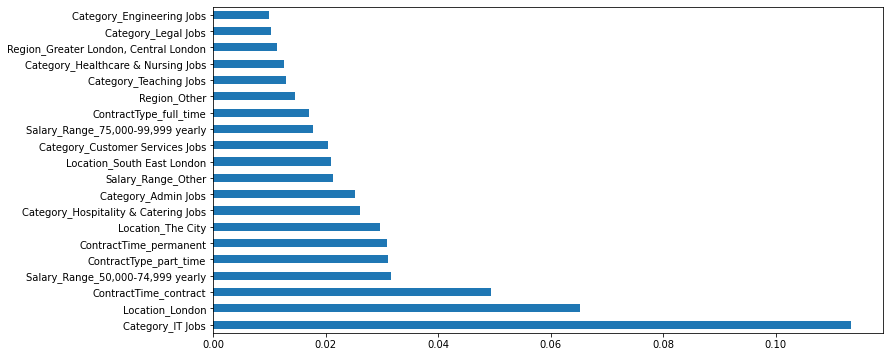

In [69]:
plt.figure(figsize = (12,6))
feat_import = pd.Series(selection.feature_importances_, index = X.columns)
feat_import.nlargest(20).plot(kind='barh')
plt.show()